In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Data

In [3]:
df = pd.read_csv('Diabetes Data Path')

In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
(df == 0).sum()

,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [11]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100

    # Print zero statistics for each clinical variable
    print(f"{col}: {zero_count} zeros ({zero_percentage:.2f}%)")

Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)


###NaN

In [12]:
df_clean = df.copy()

In [13]:
cols_invalid_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_invalid_zero:
  # Replace physiologically invalid zeros with NaN
  df_clean[col] = df_clean[col].replace(0, np.nan)

# Check missing values after cleaning
print(df_clean[cols_invalid_zero].isna().sum())

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


#Scenario Datasets

In [14]:
# Create scenario-specific datasets from cleaned data

df_impute = df_clean.copy()  # Scenario A → Imputation
df_drop = df_clean.copy()    # Scenario B → Feature removal

print("df_impute shape:", df_impute.shape)
print("df_drop shape:", df_drop.shape)

df_impute shape: (768, 9)
df_drop shape: (768, 9)


##Scenario A (Median Imputation)

In [15]:
# Compute medians correctly
insulin_median = df_clean["Insulin"].median()
skin_median = df_clean["SkinThickness"].median()

print("Insulin median:", insulin_median)
print("SkinThickness median:", skin_median)

# Apply median imputation properly
df_impute["Insulin"] = df_impute["Insulin"].fillna(insulin_median)
df_impute["SkinThickness"] = df_impute["SkinThickness"].fillna(skin_median)

# Verify
print("\nRemaining missing values:")
print(df_impute[["Insulin", "SkinThickness"]].isna().sum())

Insulin median: 125.0
SkinThickness median: 29.0

Remaining missing values:
Insulin          0
SkinThickness    0
dtype: int64


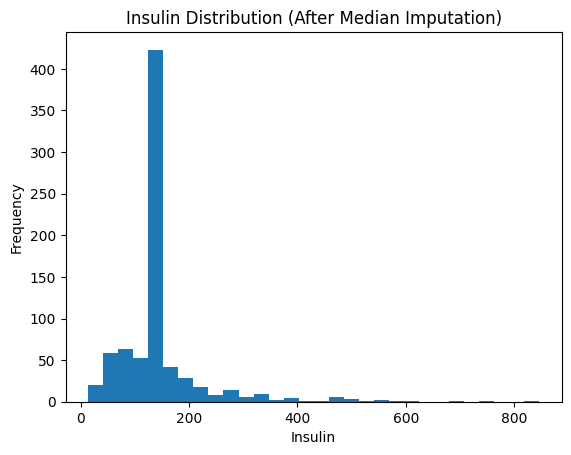

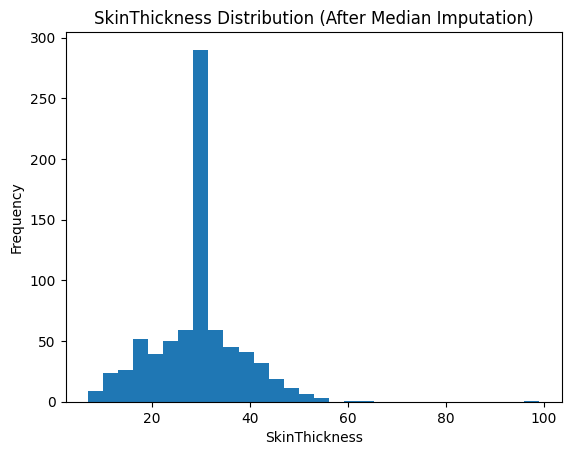

In [16]:
# Plot distributions of imputed variables
plt.hist(df_impute["Insulin"], bins=30)
plt.title("Insulin Distribution (After Median Imputation)")
plt.xlabel("Insulin")
plt.ylabel("Frequency")
plt.show()

plt.hist(df_impute["SkinThickness"], bins=30)
plt.title("SkinThickness Distribution (After Median Imputation)")
plt.xlabel("SkinThickness")
plt.ylabel("Frequency")
plt.show()

Median imputation introduces artificial peaks at the median value, particularly visible when the missing ratio is high (e.g., Insulin). This may reduce variance and potentially bias models sensitive to distributional assumptions.

In [17]:
# Measure skewness of features
df_impute.skew(numeric_only=True)

,0
Pregnancies,0.901674
Glucose,0.530989
BloodPressure,0.134153
SkinThickness,0.837608
Insulin,3.380019
BMI,0.593970
DiabetesPedigreeFunction,1.919911
Age,1.129597
Outcome,0.635017


The Insulin variable exhibits extreme positive skewness (skew = 3.38), indicating a heavy-tailed distribution with potential outliers. This justifies the use of median imputation instead of mean imputation, as the median is more robust to extreme values.

###EDA

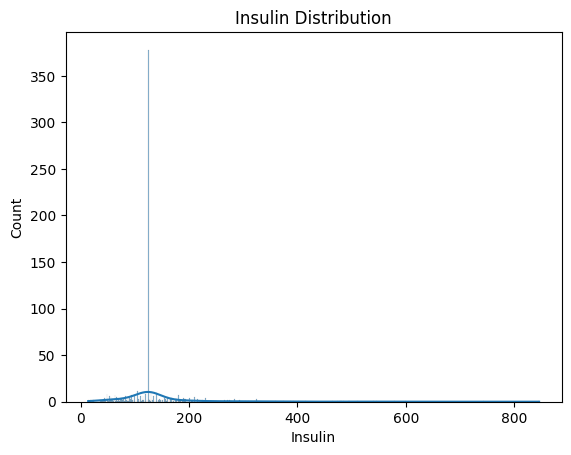

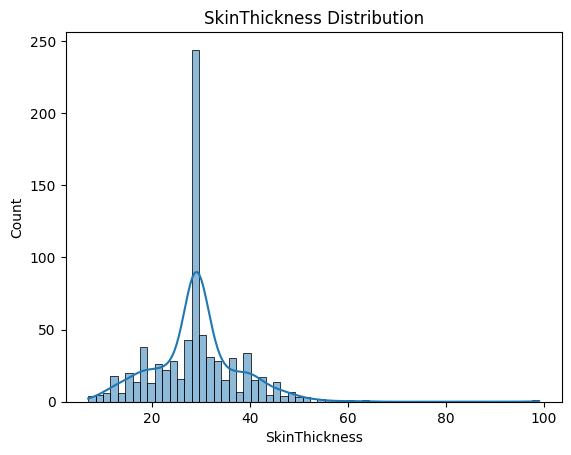

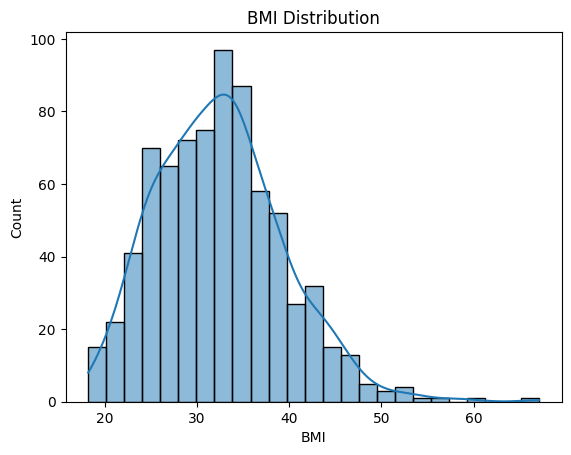

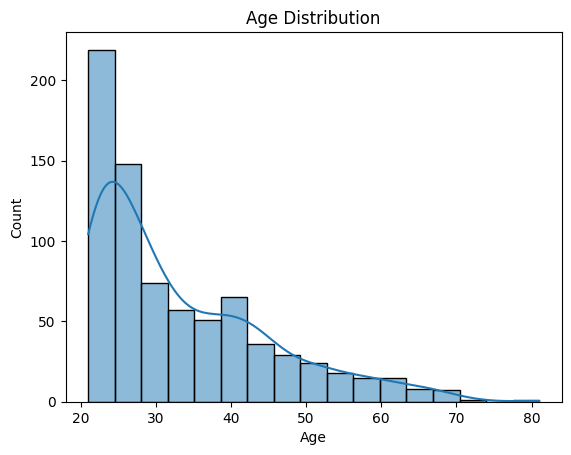

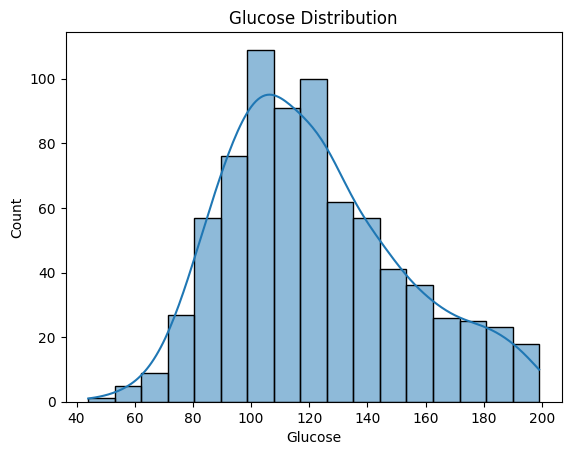

In [18]:
features_to_plot = ["Insulin", "SkinThickness", "BMI", "Age", "Glucose"]

for col in features_to_plot:
    plt.figure()
    sns.histplot(df_impute[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()

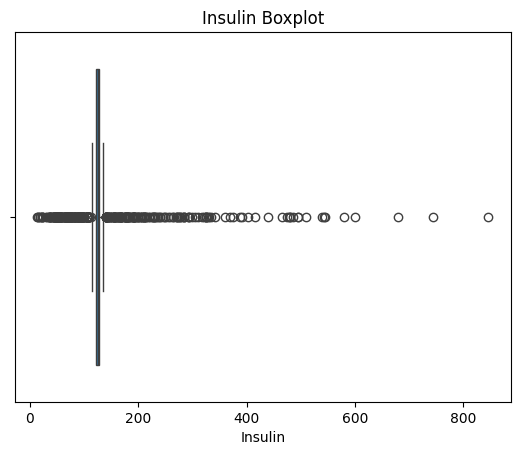

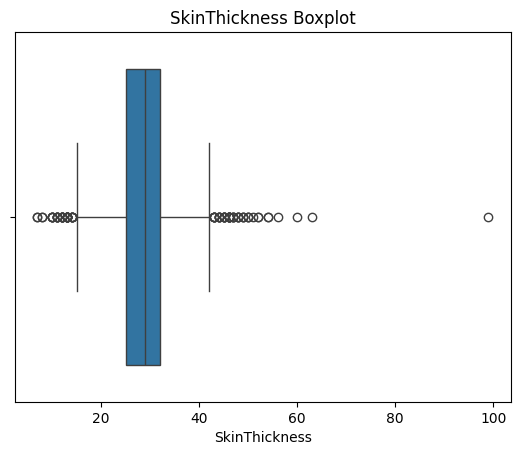

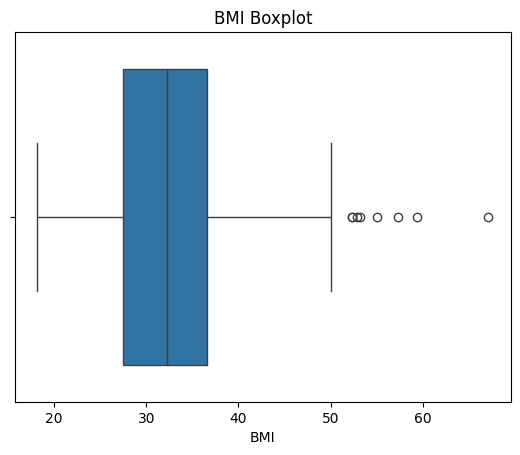

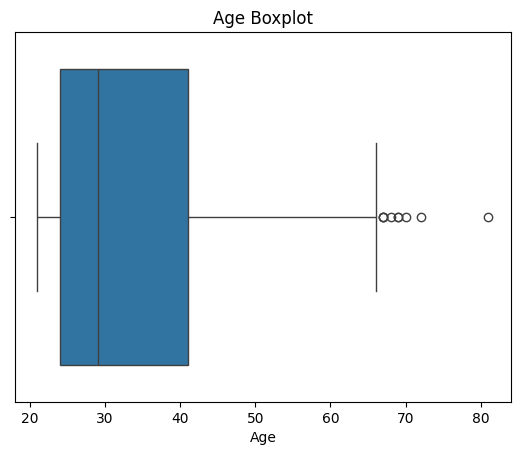

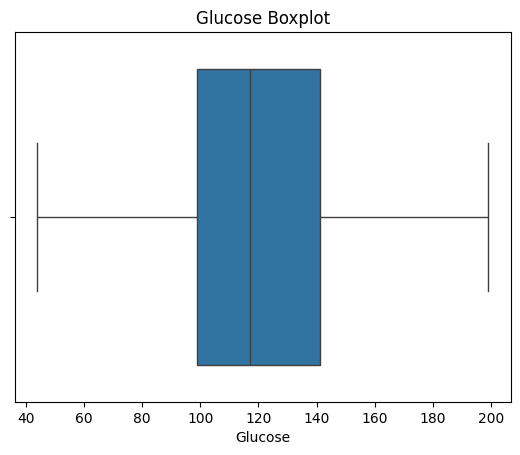

In [19]:
for col in features_to_plot:
    plt.figure()
    sns.boxplot(x=df_impute[col])
    plt.title(f"{col} Boxplot")
    plt.show()

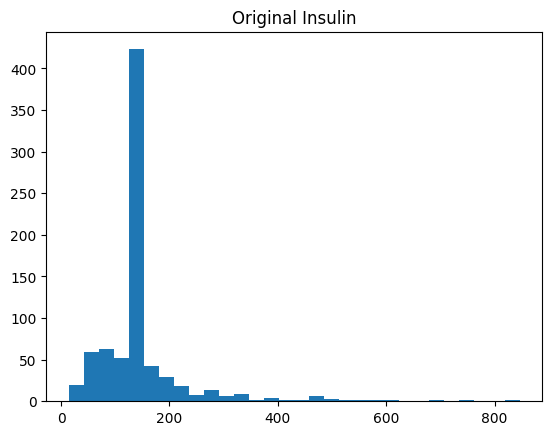

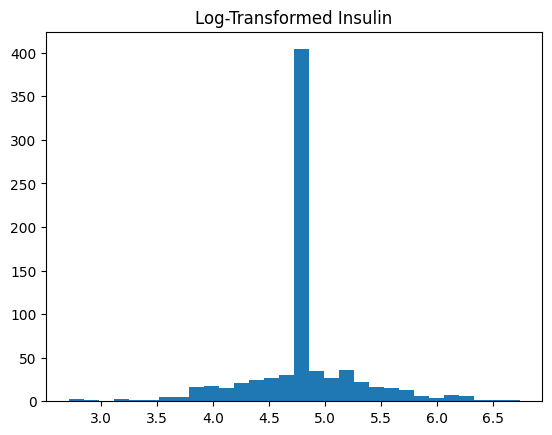

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Log-transform Insulin (log1p handles zeros safely)
df_impute["Insulin_log"] = np.log1p(df_impute["Insulin"])

plt.figure()
plt.hist(df_impute["Insulin"], bins=30)
plt.title("Original Insulin")

plt.figure()
plt.hist(df_impute["Insulin_log"], bins=30)
plt.title("Log-Transformed Insulin")

plt.show()


##Model

###Train-Test-Split

In [21]:
# Drop raw Insulin after log transform

df_impute = df_impute.drop("Insulin", axis=1)

print("Updated columns:\n", df_impute.columns)
print("\nNew shape:", df_impute.shape)

Updated columns:
 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Insulin_log'],
      dtype='object')

New shape: (768, 9)


In [22]:
# Separate features and target

X_impute = df_impute.drop("Outcome", axis=1)  # Features
y_impute = df_impute["Outcome"]               # Target

print("X shape:", X_impute.shape)
print("y shape:", y_impute.shape)

# Check class balance
print("\nClass distribution:")
print(y_impute.value_counts())
print("\nClass ratio:")
print(y_impute.value_counts(normalize=True))

X shape: (768, 8)
y shape: (768,)

Class distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Class ratio:
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


In [23]:
from sklearn.model_selection import train_test_split

# Perform stratified split to preserve class distribution

X_train, X_test, y_train, y_test = train_test_split(
    X_impute,
    y_impute,
    test_size=0.2,          # 80% train / 20% test
    random_state=42,        # reproducibility
    stratify=y_impute       # maintain class ratio
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain class ratio:")
print(y_train.value_counts(normalize=True))

print("\nTest class ratio:")
print(y_test.value_counts(normalize=True))

Train shape: (614, 8)
Test shape: (154, 8)

Train class ratio:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Test class ratio:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


In [24]:
# Convert scaled arrays back to DataFrame index-safe handling
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns=X_impute.columns)
X_test_df  = pd.DataFrame(X_test, columns=X_impute.columns)

# Compute medians from TRAIN ONLY
glucose_median = X_train_df["Glucose"].median()
bp_median      = X_train_df["BloodPressure"].median()
bmi_median     = X_train_df["BMI"].median()

# Fill missing values
X_train_df["Glucose"] = X_train_df["Glucose"].fillna(glucose_median)
X_train_df["BloodPressure"] = X_train_df["BloodPressure"].fillna(bp_median)
X_train_df["BMI"] = X_train_df["BMI"].fillna(bmi_median)

X_test_df["Glucose"] = X_test_df["Glucose"].fillna(glucose_median)
X_test_df["BloodPressure"] = X_test_df["BloodPressure"].fillna(bp_median)
X_test_df["BMI"] = X_test_df["BMI"].fillna(bmi_median)

print("Remaining missing values (train):")
print(X_train_df.isnull().sum())

print("\nRemaining missing values (test):")
print(X_test_df.isnull().sum())


Remaining missing values (train):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Insulin_log                 0
dtype: int64

Remaining missing values (test):
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Insulin_log                 0
dtype: int64


###Scaling

In [31]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train_df)


X_test_scaled = scaler.transform(X_test_df)

print("Scaled train shape:", X_train_scaled.shape)
print("Scaled test shape:", X_test_scaled.shape)

Scaled train shape: (614, 8)
Scaled test shape: (154, 8)


In [32]:
print("Train mean (approx 0):", np.mean(X_train_scaled, axis=0))
print("Train std (approx 1):", np.std(X_train_scaled, axis=0))

Train mean (approx 0): [-6.94341436e-17 -1.09937394e-16  3.09560557e-16 -3.47170718e-17
  1.64906091e-16 -1.09937394e-16 -1.08490849e-16 -8.49121714e-16]
Train std (approx 1): [1. 1. 1. 1. 1. 1. 1. 1.]


###Models

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def calculate_classification_metrics(true, predicted):
    acc = accuracy_score(true, predicted)
    prec = precision_score(true, predicted)
    rec = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return acc, prec, rec, f1

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    "Logistic Regression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM (RBF)": SVC(),
    "Naive Bayes": GaussianNB()
}

In [66]:
for name, model in models.items():

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred  = model.predict(X_test_scaled)

    # Metrics
    train_acc, train_prec, train_rec, train_f1 = calculate_classification_metrics(y_train, y_train_pred)
    test_acc, test_prec, test_rec, test_f1 = calculate_classification_metrics(y_test, y_test_pred)

    print(f"MODEL: {name}")

    print("Training Performance")
    print("Accuracy :", train_acc)
    print("Precision:", train_prec)
    print("Recall   :", train_rec)
    print("F1 Score :", train_f1)

    print("-----------------------------")

    print("Test Performance")
    print("Accuracy :", test_acc)
    print("Precision:", test_prec)
    print("Recall   :", test_rec)
    print("F1 Score :", test_f1)

    print("=============================\n")

MODEL: Logistic Regression
Training Performance
Accuracy : 0.7931596091205212
Precision: 0.7543859649122807
Recall   : 0.602803738317757
F1 Score : 0.6701298701298701
-----------------------------
Test Performance
Accuracy : 0.7012987012987013
Precision: 0.5869565217391305
Recall   : 0.5
F1 Score : 0.54

MODEL: AdaBoost
Training Performance
Accuracy : 0.8175895765472313
Precision: 0.7865168539325843
Recall   : 0.6542056074766355
F1 Score : 0.7142857142857143
-----------------------------
Test Performance
Accuracy : 0.7467532467532467
Precision: 0.6595744680851063
Recall   : 0.5740740740740741
F1 Score : 0.6138613861386139

MODEL: SVM (RBF)
Training Performance
Accuracy : 0.8469055374592834
Precision: 0.8448275862068966
Recall   : 0.6869158878504673
F1 Score : 0.7577319587628866
-----------------------------
Test Performance
Accuracy : 0.7207792207792207
Precision: 0.6222222222222222
Recall   : 0.5185185185185185
F1 Score : 0.5656565656565656

MODEL: Naive Bayes
Training Performance
Acc

Among the evaluated models, AdaBoost achieved the best overall performance in terms of accuracy and F1-score. This suggests that ensemble-based approaches are more effective in capturing the complex, non-linear relationships inherent in the diabetes dataset. While SVM demonstrated strong training performance, the larger train–test gap indicates potential overfitting. Logistic Regression, constrained by its linear decision boundary, showed comparatively lower predictive capability.

##Scenario B (Drop)

In [36]:
df_drop = df.copy()

# Drop specified features
df_drop = df_drop.drop(["Insulin", "SkinThickness"], axis=1)

print("Scenario B shape:", df_drop.shape)
print("\nColumns:")
print(df_drop.columns)

Scenario B shape: (768, 7)

Columns:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


###Train-Test Split

In [37]:
X_drop = df_drop.drop("Outcome", axis=1)
y_drop = df_drop["Outcome"]

print("X_drop shape:", X_drop.shape)
print("y_drop shape:", y_drop.shape)


X_drop shape: (768, 6)
y_drop shape: (768,)


In [38]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_drop,
    y_drop,
    test_size=0.2,
    random_state=42,
    stratify=y_drop
)

print("Train shape:", X_train_d.shape)
print("Test shape:", X_test_d.shape)

Train shape: (614, 6)
Test shape: (154, 6)


In [39]:
X_train_d = X_train_d.copy()
X_test_d = X_test_d.copy()

cols_with_invalid_zeros = ["Glucose", "BloodPressure", "BMI"]

for col in cols_with_invalid_zeros:
    X_train_d[col] = X_train_d[col].replace(0, np.nan)
    X_test_d[col]  = X_test_d[col].replace(0, np.nan)

In [40]:
# Compute medians from TRAIN ONLY
glucose_med = X_train_d["Glucose"].median()
bp_med      = X_train_d["BloodPressure"].median()
bmi_med     = X_train_d["BMI"].median()

# Fill NaNs
X_train_d["Glucose"] = X_train_d["Glucose"].fillna(glucose_med)
X_train_d["BloodPressure"] = X_train_d["BloodPressure"].fillna(bp_med)
X_train_d["BMI"] = X_train_d["BMI"].fillna(bmi_med)

X_test_d["Glucose"] = X_test_d["Glucose"].fillna(glucose_med)
X_test_d["BloodPressure"] = X_test_d["BloodPressure"].fillna(bp_med)
X_test_d["BMI"] = X_test_d["BMI"].fillna(bmi_med)


In [41]:
print("Remaining NaNs (train):")
print(X_train_d.isnull().sum())

print("\nRemaining NaNs (test):")
print(X_test_d.isnull().sum())

Remaining NaNs (train):
Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

Remaining NaNs (test):
Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


###Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

scaler_d = StandardScaler()

X_train_scaled_d = scaler_d.fit_transform(X_train_d)
X_test_scaled_d  = scaler_d.transform(X_test_d)

print("Scaled train shape:", X_train_scaled_d.shape)
print("Scaled test shape:", X_test_scaled_d.shape)


Scaled train shape: (614, 6)
Scaled test shape: (154, 6)


###Model

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [44]:
def calculate_classification_metrics(true, predicted):
    acc = accuracy_score(true, predicted)
    prec = precision_score(true, predicted)
    rec = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return acc, prec, rec, f1

In [45]:
models = {
    "Logistic Regression": LogisticRegression(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM (RBF)": SVC(),
    "Naive Bayes": GaussianNB()
}

In [46]:
for name, model in models.items():

    model.fit(X_train_scaled_d, y_train_d)

    y_train_pred_d = model.predict(X_train_scaled_d)
    y_test_pred_d  = model.predict(X_test_scaled_d)

    train_acc, train_prec, train_rec, train_f1 = calculate_classification_metrics(y_train_d, y_train_pred_d)
    test_acc, test_prec, test_rec, test_f1 = calculate_classification_metrics(y_test_d, y_test_pred_d)

In [47]:
for name, model in models.items():

    model.fit(X_train_scaled_d, y_train_d)

    y_train_pred_d = model.predict(X_train_scaled_d)
    y_test_pred_d  = model.predict(X_test_scaled_d)

    train_acc, train_prec, train_rec, train_f1 = calculate_classification_metrics(y_train_d, y_train_pred_d)
    test_acc, test_prec, test_rec, test_f1 = calculate_classification_metrics(y_test_d, y_test_pred_d)

    print(f"MODEL: {name}")

    print("Training Performance")
    print("Accuracy :", train_acc)
    print("Precision:", train_prec)
    print("Recall   :", train_rec)
    print("F1 Score :", train_f1)

    print("-----------------------------")

    print("Test Performance")
    print("Accuracy :", test_acc)
    print("Precision:", test_prec)
    print("Recall   :", test_rec)
    print("F1 Score :", test_f1)

    print("=============================\n")

MODEL: Logistic Regression
Training Performance
Accuracy : 0.7931596091205212
Precision: 0.7636363636363637
Recall   : 0.5887850467289719
F1 Score : 0.6649076517150396
-----------------------------
Test Performance
Accuracy : 0.7012987012987013
Precision: 0.5909090909090909
Recall   : 0.48148148148148145
F1 Score : 0.5306122448979592

MODEL: AdaBoost
Training Performance
Accuracy : 0.8175895765472313
Precision: 0.7802197802197802
Recall   : 0.6635514018691588
F1 Score : 0.7171717171717171
-----------------------------
Test Performance
Accuracy : 0.7597402597402597
Precision: 0.6808510638297872
Recall   : 0.5925925925925926
F1 Score : 0.6336633663366337

MODEL: SVM (RBF)
Training Performance
Accuracy : 0.8289902280130294
Precision: 0.8303030303030303
Recall   : 0.6401869158878505
F1 Score : 0.7229551451187335
-----------------------------
Test Performance
Accuracy : 0.7337662337662337
Precision: 0.6511627906976745
Recall   : 0.5185185185185185
F1 Score : 0.5773195876288659

MODEL: Naive

Interestingly, removing the Insulin and SkinThickness variables (Scenario B) led to a slight improvement in AdaBoost and SVM performance. This suggests that these features, despite being clinically meaningful, may introduce noise due to their high missingness and skewed distributions. Median imputation, while practical, appears to have introduced distributional artefacts that negatively affected certain models. Logistic Regression performance remained largely unchanged, indicating limited dependency on the removed variables.

In [67]:
import pandas as pd

df_results = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "AdaBoost",
        "SVM (RBF)",
        "Naive Bayes"
    ],

    "Scenario_A_Accuracy": [0.7013, 0.7468, 0.7208, 0.6948],
    "Scenario_B_Accuracy": [0.7013, 0.7597, 0.7338, 0.7013],

    "Scenario_A_F1": [0.5400, 0.6139, 0.5657, 0.5841],
    "Scenario_B_F1": [0.5306, 0.6337, 0.5773, 0.5818],

    "Scenario_A_Precision": [0.5870, 0.6596, 0.6222, 0.5593],
    "Scenario_B_Precision": [0.5909, 0.6809, 0.6512, 0.5714],

    "Scenario_A_Recall": [0.5000, 0.5741, 0.5185, 0.6111],
    "Scenario_B_Recall": [0.4815, 0.5926, 0.5185, 0.5926]
})

df_results

,Model,Scenario_A_Accuracy,Scenario_B_Accuracy,Scenario_A_F1,Scenario_B_F1,Scenario_A_Precision,Scenario_B_Precision,Scenario_A_Recall,Scenario_B_Recall
0,Logistic Regression,0.7013,0.7013,0.5400,0.5306,0.5870,0.5909,0.5000,0.4815
1,AdaBoost,0.7468,0.7597,0.6139,0.6337,0.6596,0.6809,0.5741,0.5926
2,SVM (RBF),0.7208,0.7338,0.5657,0.5773,0.6222,0.6512,0.5185,0.5185
3,Naive Bayes,0.6948,0.7013,0.5841,0.5818,0.5593,0.5714,0.6111,0.5926


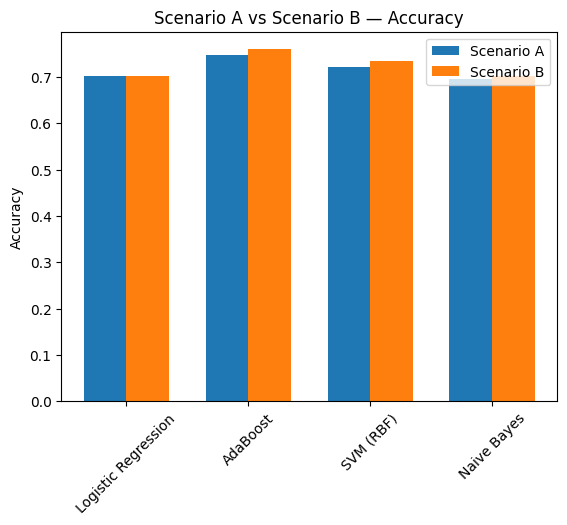

In [58]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(df_results["Model"]))
width = 0.35

plt.figure()

plt.bar(x - width/2, df_results["Scenario_A_Accuracy"], width, label="Scenario A")
plt.bar(x + width/2, df_results["Scenario_B_Accuracy"], width, label="Scenario B")

plt.xticks(x, df_results["Model"], rotation=45)
plt.ylabel("Accuracy")
plt.title("Scenario A vs Scenario B — Accuracy")
plt.legend()

plt.show()


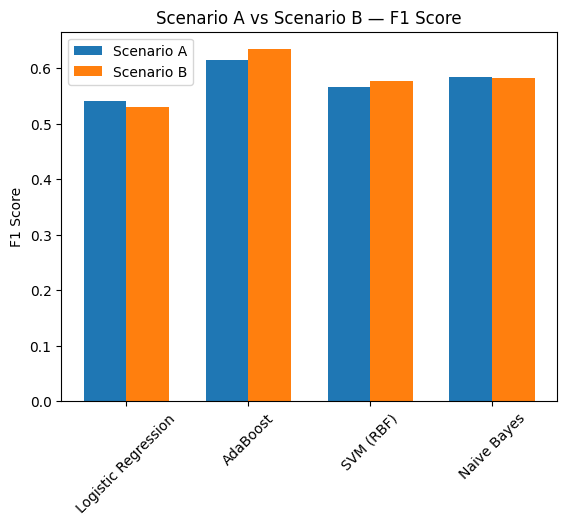

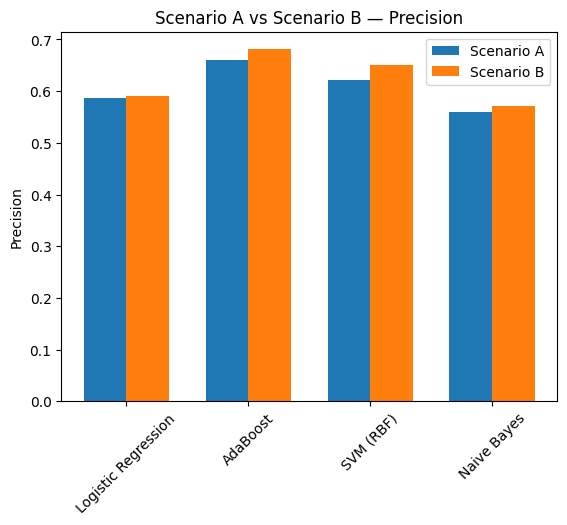

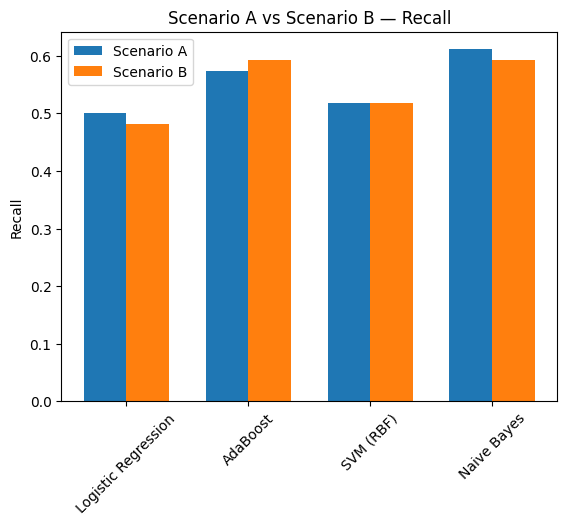

In [68]:
# F1 Score
plt.figure()
plt.bar(x - width/2, df_results["Scenario_A_F1"], width, label="Scenario A")
plt.bar(x + width/2, df_results["Scenario_B_F1"], width, label="Scenario B")
plt.xticks(x, df_results["Model"], rotation=45)
plt.ylabel("F1 Score")
plt.title("Scenario A vs Scenario B — F1 Score")
plt.legend()
plt.show()

# Precision
plt.figure()
plt.bar(x - width/2, df_results["Scenario_A_Precision"], width, label="Scenario A")
plt.bar(x + width/2, df_results["Scenario_B_Precision"], width, label="Scenario B")
plt.xticks(x, df_results["Model"], rotation=45)
plt.ylabel("Precision")
plt.title("Scenario A vs Scenario B — Precision")
plt.legend()
plt.show()

# Recall
plt.figure()
plt.bar(x - width/2, df_results["Scenario_A_Recall"], width, label="Scenario A")
plt.bar(x + width/2, df_results["Scenario_B_Recall"], width, label="Scenario B")
plt.xticks(x, df_results["Model"], rotation=45)
plt.ylabel("Recall")
plt.title("Scenario A vs Scenario B — Recall")
plt.legend()
plt.show()

Removing Insulin and SkinThickness slightly improved model performance because these features contained high missingness and skewness, which introduced noise and distributional artefacts after median imputation. Their removal simplified the feature space and reduced distortion effects.